In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv(r'/Users/wkhuz/Downloads/Test2.csv/API_EN.URB.MCTY.TL.ZS_DS2_en_csv_v2_327449.csv',sep=',', on_bad_lines='skip', skiprows=4)

Empty DataFrame
Columns: [Indicator Name, mean, median, std]
Index: []


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

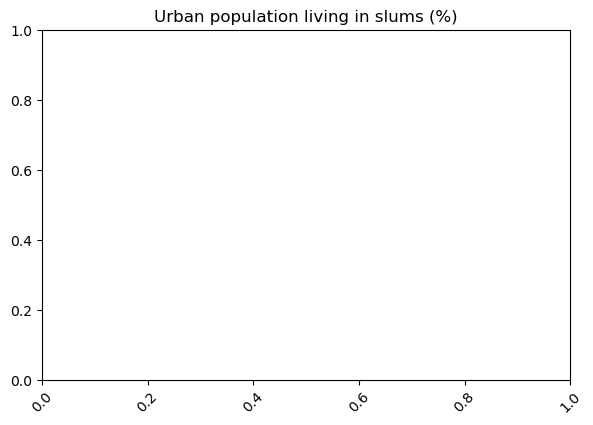

In [3]:
indicators_of_interest = [
    "Urban population living in slums (%)",
    "Access to improved water sources (%)",
    "Access to electricity (% of population)"
]

df_filtered = df[df['Indicator Name'].isin(indicators_of_interest)]

summary_stats = df_filtered.groupby('Indicator Name')['2023'].agg(['mean','median','std']).reset_index()
print(summary_stats)

plt.figure(figsize=(15,10))

# 1. Bar plot for Urban population living in slums(%)
plt.subplot(2, 2, 1)
sns.lineplot(data=df_filtered[df_filtered['Indicator Name']=="Urban population living in slums"], x='Country Code',y="2023", hue='Country Name')
plt.title('Urban population living in slums (%)')
plt.xticks(rotation=45)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

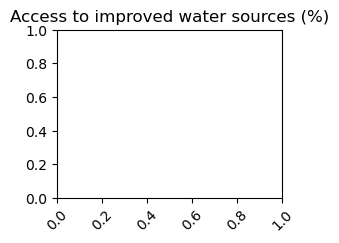

In [4]:
# 2. Line Plot for Access to improved water sources (%)
plt.subplot(2, 2, 2)
sns.lineplot(data=df_filtered[df_filtered['Indicator Name'] == "Access to improved water sources (%)"], x='2023', y='Country Code', hue='Country Name')
plt.title('Access to improved water sources (%)')
plt.xticks(rotation=45)

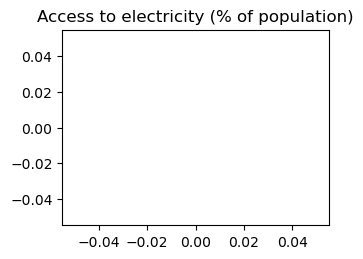

In [5]:
# 3. Histogram for Access to electricity (% of population)
plt.subplot(2, 2, 3)
sns.histplot(data=df_filtered[df_filtered['Indicator Name'] == "Access to electricity (% of population)"], x='2023', bins=20, kde=True)
plt.title('Access to electricity (% of population)')

plt.tight_layout()
plt.show()

In [6]:
# Scatter Plot for Urban population living in slums (%) vs Access to improved water sources (%)
df_wide = df_filtered.pivot_table(index=['Country Name', '2023'], columns='Indicator Name', values='2023').reset_index()
fig = px.scatter(df_wide, x="Urban population living in slums (%)", y="Access to improved water sources (%)", 
                 size="Access to electricity (% of population)", color="Country Name",
                 hover_name="Country Name", log_x=True, size_max=60)
fig.update_layout(title='Urban population living in slums (%) vs Access to improved water sources (%)')
fig.show()

ValueError: Grouper for '2023' not 1-dimensional